In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruits-and-vegetables-prices-in-usa/Prices.csv


In [2]:
file = pd.read_csv("/kaggle/input/fruits-and-vegetables-prices-in-usa/Prices.csv")

In [3]:
df = pd.DataFrame(file)

In [4]:
df.head()

,Item,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Acorn squash,Fresh,1.1804,per pound,0.4586,0.4519,pounds,1.1633
1,Apples,Fresh,1.5193,per pound,0.9000,0.2425,pounds,0.4094
2,"Apples, applesauce",Canned,1.0660,per pound,1.0000,0.5401,pounds,0.5758
3,"Apples, frozen concentrate",Juice,0.5853,per pint,1.0000,8.0000,fluid ounces,0.2926
4,"Apples, ready-to-drink",Juice,0.7804,per pint,1.0000,8.0000,fluid ounces,0.3902


In [5]:
df["RetailPriceUnit"].unique()

array(['per pound', 'per pint'], dtype=object)

In [6]:
df["Yield"]

0      0.4586
1      0.9000
2      1.0000
3      1.0000
4      1.0000
        ...  
150    0.7500
151    0.6500
152    0.7760
153    0.5200
154    0.7695
Name: Yield, Length: 155, dtype: float64

In [7]:
df.describe()

,RetailPrice,Yield,CupEquivalentSize,CupEquivalentPrice
count,155.000000,155.000000,155.000000,155.000000
mean,2.179553,0.926450,0.885175,0.814088
std,1.559205,0.400215,1.974584,0.485388
min,0.360400,0.375000,0.123200,0.202100
25%,1.156550,0.665000,0.319700,0.519850
50%,1.721800,0.910000,0.352700,0.676900
75%,2.578300,1.000000,0.385800,1.022300
max,10.552700,2.539700,8.000000,3.070000


In [8]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [9]:
retail_price_unit_counts=df["RetailPriceUnit"].value_counts()

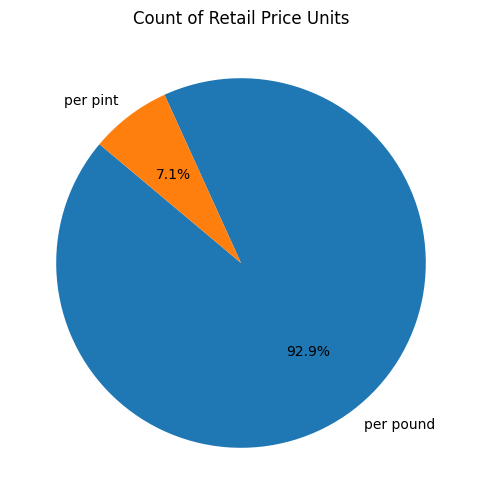

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a bar plot
plt.pie(retail_price_unit_counts, labels=retail_price_unit_counts.index, autopct='%1.1f%%', startangle=140)

# Adding titles and labels
plt.title('Count of Retail Price Units')


# Show the plot
plt.show()


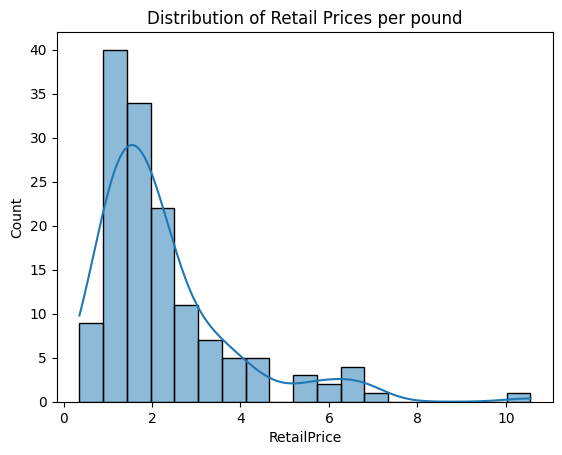

In [11]:
# Histogram for RetailPrice per pound
df_per_pound=df[df["RetailPriceUnit"]=="per pound"]
plt.subplot(1, 1, 1)
sns.histplot(df_per_pound['RetailPrice'], kde=True)
plt.title('Distribution of Retail Prices per pound')

plt.show()


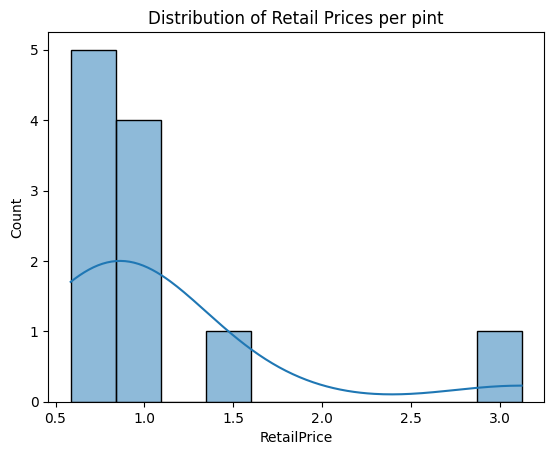

In [12]:
# Histogram for RetailPrice
df_per_pint=df[df["RetailPriceUnit"]=="per pint"]
plt.subplot(1, 1, 1)
sns.histplot(df_per_pint['RetailPrice'], kde=True)
plt.title('Distribution of Retail Prices per pint')

plt.show()


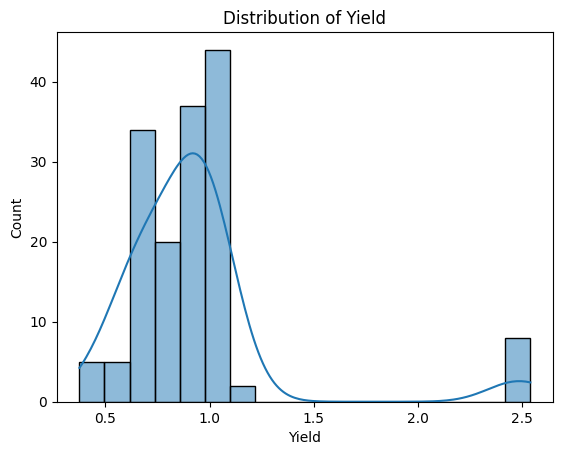

In [13]:

# Histogram for Yield
plt.subplot(1, 1, 1)
sns.histplot(df['Yield'], kde=True)
plt.title('Distribution of Yield')
plt.show()

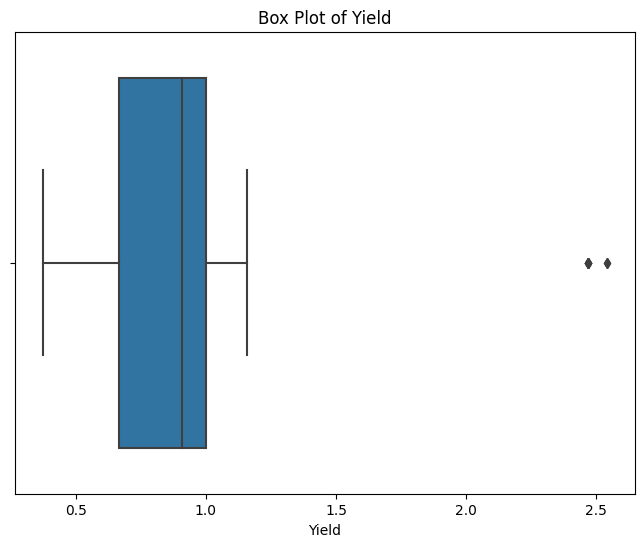

                     Item    Form  RetailPrice RetailPriceUnit   Yield  \
13              Asparagus  Frozen       6.7045       per pound  1.0335   
19            Black beans   Dried       1.3753       per pound  2.4692   
23          Blackeye peas   Dried       1.7584       per pound  2.5397   
29       Brussels sprouts   Fresh       2.6895       per pound  1.0600   
49         Collard greens   Fresh       2.6820       per pound  1.1600   
69   Great northern beans   Dried       1.6965       per pound  2.4692   
77                   Kale   Fresh       2.5018       per pound  1.0500   
80           Kidney beans   Dried       1.7218       per pound  2.4692   
82                Lentils   Dried       1.6493       per pound  2.4692   
87             Lima beans  Frozen       1.8995       per pound  1.0970   
88             Lima beans   Dried       2.1861       per pound  2.5397   
100            Navy beans   Dried       1.4942       per pound  2.4692   
125           Pinto beans   Dried     

In [14]:
# Box plot for Yield
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Yield'])
plt.title('Box Plot of Yield')
plt.show()

# Filter and inspect outliers
outliers = df[df['Yield'] > 1]
print(outliers)
percentage_of_outliers=(outliers.shape[0]/df.shape[0])* 100
print(percentage_of_outliers)

In [15]:
# Assuming 'df' is your original DataFrame and 'outliers' is a DataFrame of outlier rows
df = df.drop(outliers.index)

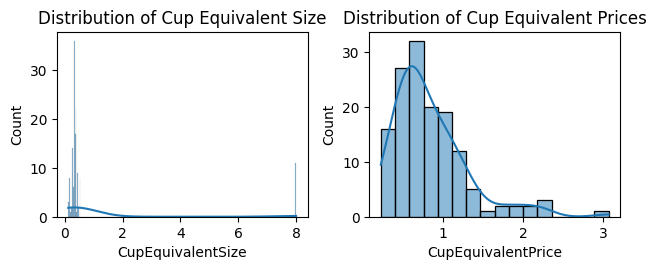

In [16]:

# Histogram for CupEquivalentSize
plt.subplot(2, 2, 3)
sns.histplot(df['CupEquivalentSize'], kde=True)
plt.title('Distribution of Cup Equivalent Size')

# Histogram for CupEquivalentPrice
plt.subplot(2, 2, 4)
sns.histplot(df['CupEquivalentPrice'], kde=True)
plt.title('Distribution of Cup Equivalent Prices')

plt.tight_layout()